# Convex Hull
#### 2D - Graham Scan

In [1]:
# imports

import random
import matplotlib.pyplot as plt
import math
import numpy as np


In [2]:
# generate random coordinates

def generateCoordinates(x_min : int, y_min : int, x_max : int, y_max : int, n : int) -> list[int]:
    plane : list[int] = [(random.randint(x_min,x_max+1),random.randint(y_min,y_max+1)) for _ in range(n)]
    return plane

In [3]:
def display_coordinates(coordinates):
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]
    
    plt.scatter(x[0], y[0], color='red')  
    plt.scatter(x[1:], y[1:])  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Coordinates')
    plt.show()

def display_coordinates_WithLines(coordinates):
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]
    
    plt.scatter(x[0], y[0], color='red')  
    plt.scatter(x[1:], y[1:])  
    
    for i in range(1, len(coordinates)):
        plt.plot([x[0], x[i]], [y[0], y[i]], color='black')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Coordinates')
    plt.show()

def plot_points_and_line(points1, points2):
    x1, y1 = zip(*points1)
    x2, y2 = zip(*points2)

    plt.scatter(x1[0], y1[0], color='red')
    plt.scatter(x1[1:], y1[1:])
    plt.plot(x2, y2, color='red')

    plt.show()




In [4]:
def sortByAngle(p):
    points = sorted(p, key=lambda x: (x[1],x[0]))
    print(points)
    display_coordinates(points)

    start = points[0]
    sortedByAngle = sorted(points, key = lambda point : math.atan2(point[1]-start[1], point[0]-start[0]))
    print(sortedByAngle)
    display_coordinates_WithLines(sortedByAngle)
    return points, sortedByAngle


In [5]:
def walkAround(points):
    npPoints = [np.array(x) for x in points]
    circumference = []
    for point in npPoints:
        while len(circumference) >= 2 and np.cross(circumference[-1] - circumference[-2], point - circumference[-1]) < 0:
            circumference.pop()
        circumference.append(point)
    circumference.append(points[0])
    print(circumference)
    return circumference

[(-390, -497), (-23, -473), (25, -457), (-10, -445), (-37, -427), (-287, -409), (75, -405), (184, -401), (302, -401), (-453, -389), (-454, -378), (207, -374), (402, -372), (444, -371), (492, -371), (265, -366), (114, -338), (412, -318), (28, -317), (-84, -314), (-38, -313), (268, -298), (-460, -292), (319, -289), (301, -278), (-407, -258), (-69, -238), (308, -233), (-418, -224), (-302, -221), (207, -221), (-329, -209), (309, -194), (-63, -190), (347, -186), (380, -183), (-299, -176), (-140, -169), (-131, -167), (184, -158), (-166, -151), (471, -116), (20, -110), (-338, -103), (-401, -88), (177, -68), (348, -51), (194, -50), (-317, -41), (-195, -36), (214, -35), (-189, -30), (218, -27), (191, -21), (-471, -5), (315, 2), (-386, 4), (249, 28), (-79, 65), (490, 66), (-49, 77), (-144, 83), (-454, 91), (-419, 94), (130, 99), (-262, 106), (-500, 109), (488, 111), (471, 151), (-144, 152), (-440, 165), (-293, 175), (197, 198), (-325, 201), (-174, 201), (-414, 212), (-331, 220), (-392, 251), (-4

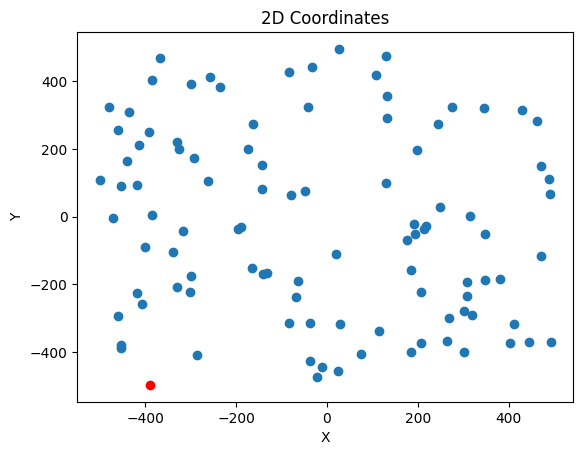

[(-390, -497), (-23, -473), (25, -457), (-10, -445), (302, -401), (492, -371), (444, -371), (402, -372), (184, -401), (75, -405), (-37, -427), (265, -366), (207, -374), (412, -318), (319, -289), (268, -298), (114, -338), (301, -278), (308, -233), (380, -183), (347, -186), (28, -317), (309, -194), (471, -116), (207, -221), (-38, -313), (184, -158), (-84, -314), (348, -51), (490, 66), (488, 111), (315, 2), (471, 151), (177, -68), (214, -35), (194, -50), (218, -27), (-69, -238), (191, -21), (249, 28), (-287, -409), (461, 284), (-63, -190), (20, -110), (429, 316), (346, 322), (130, 99), (197, 198), (244, 273), (276, 323), (-131, -167), (-140, -169), (131, 293), (-166, -151), (133, 357), (-49, 77), (-79, 65), (107, 419), (129, 475), (-189, -30), (-144, 83), (-42, 324), (-195, -36), (27, 496), (-33, 442), (-144, 152), (-83, 429), (-302, -221), (-174, 201), (-162, 273), (-299, -176), (-262, 106), (-329, -209), (-235, 382), (-317, -41), (-258, 414), (-293, 175), (-338, -103), (-299, 393), (-32

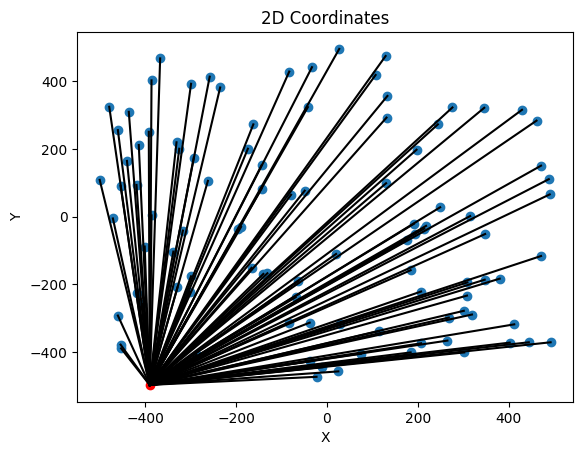

[array([-390, -497]), array([ -23, -473]), array([ 492, -371]), array([490,  66]), array([488, 111]), array([461, 284]), array([429, 316]), array([129, 475]), array([ 27, 496]), array([-367,  468]), array([-479,  325]), array([-500,  109]), array([-453, -389]), (-390, -497)]


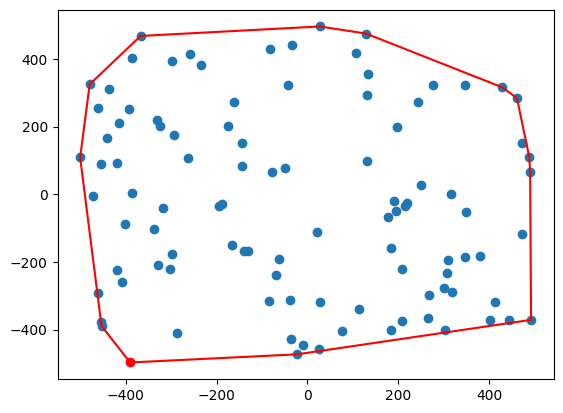

In [6]:
initialPoints = generateCoordinates(-500, -500, 500, 500, 100)
initialPoints, sortedPoints = sortByAngle(initialPoints)
boundary = walkAround(sortedPoints)
plot_points_and_line(initialPoints, boundary)
